# Invisibility cloak.

Create your own Harry Potter invisibility cloak with a dynamic background.

In [1]:
# Importation of libraries.
import cv2 
import cvzone
from cvzone.SelfiSegmentationModule import SelfiSegmentation
import numpy as np
import mediapipe
import time

In [2]:
# Invisibility cloak function, refer to Reto1.

def capainvisibilidad(img, background):

    # Convert the image to the HSV model so it has a wider range of colors.
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) 

    # Store the lowest H, S and V values of the range of your chosen color color.
    h_lower = cv2.getTrackbarPos("lower hue","trackbar")
    s_lower = cv2.getTrackbarPos("lower saturation","trackbar")
    v_lower = cv2.getTrackbarPos("lower value","trackbar")
    
    # Store the upper H, S and V values of the range of your chosen color color.
    h_upper = cv2.getTrackbarPos("upper hue","trackbar")
    s_upper = cv2.getTrackbarPos("upper saturation","trackbar")
    v_upper = cv2.getTrackbarPos("upper value","trackbar")

    # Detect if the chosen color is present in the image being captured by the camera.
    # Create a binary mask to perfom binary operations. 
    # cv2.inRange returns either 255 if the elements of the given array are present between the lower and upper bounds or 0 if they don't.
    lower = np.array([h_lower, s_lower, v_lower])
    upper = np.array([h_upper, s_upper, v_upper])
    mask1 = cv2.inRange(hsv, lower, upper)
    
    # Use MORPH_OPEN to remove noise from the image.
    mask1 = cv2.morphologyEx(mask1, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))
    
    # Create an inverted mask to segment out the cloak from the frame.
    mask2 = cv2.bitwise_not(mask1) 
    # Segment out the cloak of the frame using the inverted mask.
    result1 = cv2.bitwise_and(img, img, mask=mask2)
    result2 = cv2.bitwise_and(background, background, mask=mask1)

    finalOutput = cv2.addWeighted(result1, 1, result2, 1, 0)

    return finalOutput

In [3]:
# Capture the video: 0 for the camera of your computer, 1 if it's external.
cap = cv2.VideoCapture(0)
# Set size.
cap.set(3,640)
cap.set(4,480)
# Set FPS. 
cap.set(cv2.CAP_PROP_FPS,60)

# SelfiSegmenation module
segmentor = SelfiSegmentation()
# Helps in finding Frames Per Second and display on an OpenCV Image
fpsreader = cvzone.FPS()
# Store your moving background.
background = cv2.VideoCapture("Aquarium.mp4")

# Add trackbars to modify the HSV values according to the color of your cloak.
def nothing(x):
    pass

cv2.namedWindow("trackbar")
cv2.resizeWindow("trackbar", 320,240)
cv2.createTrackbar("lower hue","trackbar",0,180,nothing)
cv2.createTrackbar("lower saturation","trackbar",0,255,nothing)
cv2.createTrackbar("lower value","trackbar",0,255,nothing)
cv2.createTrackbar("upper hue","trackbar",0,180,nothing)
cv2.createTrackbar("upper saturation","trackbar",0,255,nothing)
cv2.createTrackbar("upper value","trackbar",0,255,nothing)

while(background.isOpened()):
    
    # Moving background is stored in frame.
    ret, frame = background.read()
    # Important to resize the background, it must be the same size as the VideoCapture.
    frame = cv2.resize(frame,(640,480))

    success, image = cap.read()
    # Apply the invisibility cloak function
    image = capainvisibilidad(image,frame)
    output = segmentor.removeBG(image,frame,threshold=0.8)
    
    # Display an image window. 
    cv2.imshow("Magic!",output)
    
    # Close the image window by pressing 'q' for 1 second.
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
background.release()
cv2.destroyAllWindows()

# HSV Color map.

X axis indicate the Hue values. <br>
*If your cloak is blue, set the H value from 100 - 130 <br><br>
Y axis indicate the Saturation values. <br>
It's recommended to set the Value value in a range from 20 to 255.

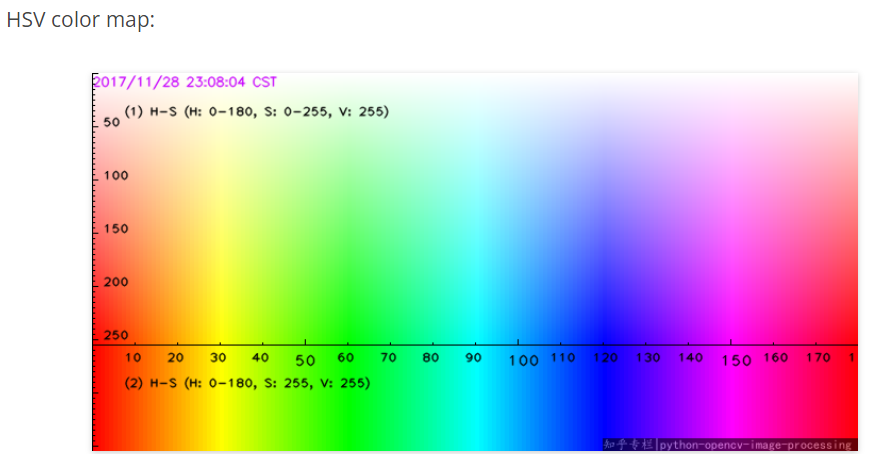

In [4]:
from IPython.display import Image
Image(filename="HSVColorMap.png", width=700, height=600)